# CIFAR-10 Dataset

1. The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class.
2. There are 50000 training images and 10000 test images.
3. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

Classes include:-
1. Airplane
2. Automobile
3. Bird
4. Cat
5. Deer
6. Dog
7. Frog
8. Horse
9. Ship
10. Truck

### Import relevant Librabries and Load the Data

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(train_inputs, train_targets) , (test_inputs, test_targets) = tf.keras.datasets.cifar10.load_data()
train_inputs.shape , train_targets.shape

170498071/170498071 [==============================] - 68s 0us/step


((50000, 32, 32, 3), (50000, 1))

### Initials

In [3]:
# train_targets and test_targets is actually a 2 dimentional array([[6],[9],[9],[4],[1]]), so we flatten them into one dimention
train_targets = train_targets.reshape(-1)
# the '-1' indicates the size of the dimention so that the total no. of elements remains the same
test_targets = test_targets.reshape(-1)

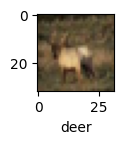

In [4]:
classes = ['airplanes', 'automobiles', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# We will define a function to display the image for any record
def plot_sample(input, target, index):
    plt.figure(figsize = (1,1)) # specifies width and heigth of the figure
    plt.imshow(input[index])
    plt.xlabel(classes[target[index]])
plot_sample(train_inputs,train_targets,3)

### Normalize the data

In [5]:
train_inputs = train_inputs/255
test_inputs = test_inputs/255

### We will first try using ANN, for comparison

In [ ]:
ANN = tf.keras.Sequential([
                                tf.keras.layers.Flatten( input_shape = (32,32,3)),
                                tf.keras.layers.Dense(3000 , activation= 'relu'),
                                tf.keras.layers.Dense(1000 , activation= 'relu'),
                                tf.keras.layers.Dense(10 , activation='softmax')
                            ])
ANN.compile(optimizer = 'adam',
            loss= 'sparse_categorical_crossentropy',
            metrics = ['accuracy']
            )

ANN.fit(train_inputs,
        train_targets,
        batch_size=100,
        validation_split= 0.2,
        epochs =5,
        verbose=2
        )

Epoch 1/5
400/400 - 116s - loss: 2.0768 - accuracy: 0.3104 - val_loss: 1.7577 - val_accuracy: 0.3742 - 116s/epoch - 289ms/step
Epoch 2/5
400/400 - 121s - loss: 1.6958 - accuracy: 0.3952 - val_loss: 1.7279 - val_accuracy: 0.3806 - 121s/epoch - 304ms/step
Epoch 3/5
400/400 - 127s - loss: 1.6023 - accuracy: 0.4280 - val_loss: 1.5836 - val_accuracy: 0.4401 - 127s/epoch - 317ms/step
Epoch 4/5
400/400 - 120s - loss: 1.5355 - accuracy: 0.4508 - val_loss: 1.5820 - val_accuracy: 0.4319 - 120s/epoch - 301ms/step
Epoch 5/5
400/400 - 133s - loss: 1.4943 - accuracy: 0.4663 - val_loss: 1.5475 - val_accuracy: 0.4556 - 133s/epoch - 332ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

test_predict_ann = ANN.predict(test_inputs)
predict_class_ann = [np.argmax(element) for element in test_predict_ann]

print("classification Report:\n", classification_report(test_targets,predict_class_ann))


313/313 [==============================] - 9s 28ms/step
classification Report:
               precision    recall  f1-score   support

           0       0.48      0.62      0.54      1000
           1       0.64      0.56      0.59      1000
           2       0.31      0.42      0.35      1000
           3       0.36      0.29      0.32      1000
           4       0.43      0.23      0.30      1000
           5       0.38      0.39      0.39      1000
           6       0.49      0.53      0.51      1000
           7       0.44      0.59      0.50      1000
           8       0.68      0.45      0.54      1000
           9       0.55      0.56      0.56      1000

    accuracy                           0.46     10000
   macro avg       0.48      0.46      0.46     10000
weighted avg       0.48      0.46      0.46     10000



### ANN conclusion:
1. the f1 score of all classes are too low.
2. The accuracy is below 50% hence not useful.
3. ANN cannot effectively predict data.

Note on above values:
1. Precision: the accuracy of positive predictions made by a model
- Precision = TP / (TP + FP), where TP is True Positives and FP is False Positives.
2. Recall: the model's ability to correctly identify all positive instances.
- Recall = TP / (TP + FN), where TP is True Positives and FN is False Negatives.
3. F1-score: a harmonic mean of precision and recall
- F1 Score = 2 * (Precision * Recall) / (Precision + Recall)
4. Support: the number of instances in each class, which helps provide context for the other metrics. It's not a metric for model performance but is often displayed alongside precision, recall, and F1 score to give a sense of the class distribution.
5. The ideal values for precision, recall and f1-score is 1.

# Convolutional Neural Network

In [14]:
CNN = tf.keras.Sequential([
                            #CNN layers:
                            tf.keras.layers.Conv2D(filters =32, kernel_size = (3,3), activation ='relu', input_shape=(32,32,3)),
                            tf.keras.layers.MaxPooling2D((2,2)),
                            # detect 32 different filters
                            # filter size 3*3
                            # average pooling can also be used
                            # other activation function can be used, but relu is less expensive to calculate
                            # we can have as many convolution layer as we need
                            tf.keras.layers.Conv2D(filters =32, kernel_size = (3,3), activation ='relu'),
                            tf.keras.layers.MaxPooling2D((2,2)),

                            #Dense Layers:
                            tf.keras.layers.Flatten(),  # the model will automatically figure out the shape
                            tf.keras.layers.Dense(128,activation='relu'),
                            tf.keras.layers.Dropout(0.3),
                            tf.keras.layers.Dense(10,activation='softmax')
                          ])


In [15]:
CNN.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
            )
CNN.fit(train_inputs, train_targets, epochs =10)

Epoch 1/10
1563/1563 [==============================] - 31s 19ms/step - loss: 1.5778 - accuracy: 0.4288
Epoch 2/10
1563/1563 [==============================] - 35s 23ms/step - loss: 1.2458 - accuracy: 0.5591
Epoch 3/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.1177 - accuracy: 0.6058
Epoch 4/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.0371 - accuracy: 0.6350
Epoch 5/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.9794 - accuracy: 0.6553
Epoch 6/10
1563/1563 [==============================] - 29s 18ms/step - loss: 0.9343 - accuracy: 0.6702
Epoch 7/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.8909 - accuracy: 0.6895
Epoch 8/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.8615 - accuracy: 0.6974
Epoch 9/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.8225 - accuracy: 0.7109
Epoch 10/10
1563/1563 [==============================] - 28s 18m

In [16]:
CNN.evaluate(test_inputs, test_targets)

313/313 [==============================] - 2s 6ms/step - loss: 0.8940 - accuracy: 0.6980


[0.894005537033081, 0.6980000138282776]

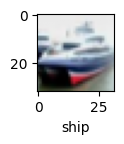

In [17]:
plot_sample(test_inputs,test_targets,1)

In [19]:
# let's predict all test inputs
test_predict_cnn = CNN.predict(test_inputs)
# we use argmax to know the class with highest probability
predict_class_cnn = [np.argmax(element) for element in test_predict_cnn]
#np.argmax() returns the index containing the highest vlaue

from sklearn.metrics import confusion_matrix, classification_report
print("classification Report:\n", classification_report(test_targets,predict_class_cnn))


313/313 [==============================] - 2s 7ms/step
classification Report:
               precision    recall  f1-score   support

           0       0.76      0.72      0.74      1000
           1       0.83      0.81      0.82      1000
           2       0.62      0.56      0.59      1000
           3       0.55      0.47      0.51      1000
           4       0.67      0.61      0.64      1000
           5       0.60      0.60      0.60      1000
           6       0.65      0.85      0.74      1000
           7       0.82      0.71      0.76      1000
           8       0.78      0.81      0.80      1000
           9       0.70      0.83      0.76      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.69     10000
weighted avg       0.70      0.70      0.69     10000



'bird'

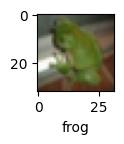

In [30]:
index=7
plot_sample(test_inputs, test_targets, index)
# our model predicted
classes[predict_class_cnn[index]]
# wrong prediction

Conclusion:
1. We got 70% accuracy, which is good. Because this is a difficult dataset, for some records even we wont be able to distinguish the images into classes. Check above example
2. We got remarkable f1 scorefor each class, compared to ANN.